In [1]:
import torch
from torch.nn import CrossEntropyLoss, Linear, Module, ReLU, Sequential
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

from smolai import Trainer
from smolai.callbacks.report import ReportAverageLossWithPlot, ReportMetricsWithLogger
from smolai.metrics import Accuracy
from smolai.callbacks.lr import LrFinder

/Users/jeremyfisher/mambaforge/envs/smolai/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_ds = MNIST(root="data", train=True, download=True, transform=ToTensor())
train_dl = DataLoader(train_ds, batch_size=256, shuffle=True)
test_ds = MNIST(root="data", train=False, download=True, transform=ToTensor())
test_dl = DataLoader(test_ds, batch_size=256, shuffle=False)

In [3]:
class MnistModel(Module):
    def __init__(self) -> None:
        super().__init__()
        self.net = Sequential(
            Linear(28 * 28, 30),
            ReLU(),
            Linear(30, 10),
        )

    def forward(self, xb):
        return self.net(xb.view(xb.size(0), -1))

In [4]:
model = MnistModel()
criterion=CrossEntropyLoss()

In [5]:
lrf = LrFinder()

In [6]:
trainer = Trainer(
    model=MnistModel(),
    criterion=CrossEntropyLoss(),
    opt_func=torch.optim.AdamW,
    callbacks=[lrf],
    lr=1e-10
).fit(train_dl=train_dl)

2022-12-19 16:39:31.344 | DEBUG    | smolai.callbacks:run_lifecycle:136 - Caught CancelFit in train hook.


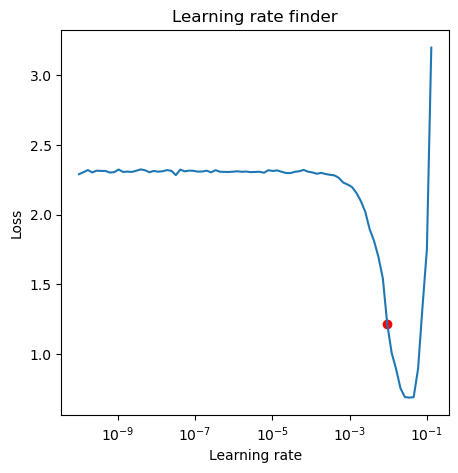

In [7]:
lrf.plot()

In [8]:
lrf.suggest()

(0.009463126845172875, 1.2149381637573242)